<b> Import the Libraries </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b> Read the CSV Files </b>

In [2]:
df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7612\1488930178.py:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')


<b> Check the 17th and 18th columns, which contain mixed types of data (float and string) </b>

In [3]:
df['Low_Confidence_Limit'].unique()

array([35.9, 13.4, 16.0, ..., '97.7', 99.3, 99.4], dtype=object)

In [4]:
df['High_Confidence_Limit'].unique()

array([37.7, 17.9, 33.2, ..., 1.9, 1.4, 1.6], dtype=object)

<b> Check the Dataframe Information </b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Response                    0 non-null       float64
 10  Data_Value_Unit             250937 non-null  object 
 11  DataValueTypeID             250937 non-null  object 
 12  Data_Value_Type             250937 non-null  object 
 13  Data_Value    

<b> Delete Columns that Have 0 non-null Values </b>

In [6]:
df = df.drop(['Response', 'Sample_Size', 'StratificationCategory3', 'Stratification3', 
              'ResponseID', 'StratificationCategoryID3', 'StratificationID3', 'Report'],
              axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RowId                       250937 non-null  object 
 1   YearStart                   250937 non-null  int64  
 2   YearEnd                     250937 non-null  int64  
 3   LocationAbbr                250937 non-null  object 
 4   LocationDesc                250937 non-null  object 
 5   Datasource                  250937 non-null  object 
 6   Class                       250937 non-null  object 
 7   Topic                       250937 non-null  object 
 8   Question                    250937 non-null  object 
 9   Data_Value_Unit             250937 non-null  object 
 10  DataValueTypeID             250937 non-null  object 
 11  Data_Value_Type             250937 non-null  object 
 12  Data_Value                  169302 non-null  float64
 13  Data_Value_Alt

In [8]:
df.head(1)

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2015~2015~9003~Q43~TOC11~AGE~OVERALL,2015,2015,SOU,South,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,...,NaN,NaN,C01,TOC11,Q43,9003,AGE,5064,OVERALL,OVERALL


<b> Due to the Limited Usefulness of the 'RowId', Drop the Column </b>

In [9]:
df = df.drop('RowId', axis = 1)

<b> Retrieve the Unique Values from All Columns </b>

In [10]:
df['YearStart'].unique()

array([2015, 2021, 2020, 2016, 2019, 2017, 2018], dtype=int64)

In [11]:
df['YearEnd'].unique()

array([2015, 2021, 2020, 2016, 2019, 2017, 2018], dtype=int64)

In [12]:
df['LocationAbbr'].unique()

array(['SOU', 'AL', 'OR', 'NE', 'IN', 'AZ', 'OH', 'VT', 'UT', 'WI', 'GA',
       'IA', 'NRE', 'NC', 'TN', 'SD', 'NV', 'MDW', 'MN', 'CO', 'ID',
       'WEST', 'VI', 'CA', 'AR', 'FL', 'DE', 'CT', 'HI', 'GU', 'KS', 'IL',
       'LA', 'MD', 'KY', 'MA', 'ME', 'MI', 'MT', 'MS', 'MO', 'NH', 'NJ',
       'US', 'ND', 'NM', 'NY', 'PR', 'PA', 'RI', 'TX', 'VA', 'WA', 'WV',
       'WY', 'OK', 'DC', 'AK', 'SC'], dtype=object)

In [13]:
df['LocationDesc'].unique()

array(['South', 'Alabama', 'Oregon', 'Nebraska', 'Indiana', 'Arizona',
       'Ohio', 'Vermont', 'Utah', 'Wisconsin', 'Georgia', 'Iowa',
       'Northeast', 'North Carolina', 'Tennessee', 'South Dakota',
       'Nevada', 'Midwest', 'Minnesota', 'Colorado', 'Idaho', 'West',
       'Virgin Islands', 'California', 'Arkansas', 'Florida', 'Delaware',
       'Connecticut', 'Hawaii', 'Guam', 'Kansas', 'Illinois', 'Louisiana',
       'Maryland', 'Kentucky', 'Massachusetts', 'Maine', 'Michigan',
       'Montana', 'Mississippi', 'Missouri', 'New Hampshire',
       'New Jersey', 'United States, DC & Territories', 'North Dakota',
       'New Mexico', 'New York', 'Puerto Rico', 'Pennsylvania',
       'Rhode Island', 'Texas', 'Virginia', 'Washington', 'West Virginia',
       'Wyoming', 'Oklahoma', 'District of Columbia', 'Alaska',
       'South Carolina'], dtype=object)

In [14]:
df['Datasource'].unique()

array(['BRFSS'], dtype=object)

<b> Due to the Limited Usefulness of the 'Datasource', Drop the Column </b>

In [15]:
df = df.drop('Datasource', axis = 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value_Type             250937 non-null  object 
 10  Data_Value                  169302 non-null  float64
 11  Data_Value_Alt              169302 non-null  float64
 12  Data_Value_Footnote_Symbol  99114 non-null   object 
 13  Data_Value_Foo

In [17]:
df['Class'].unique()

array(['Overall Health', 'Mental Health',
       'Nutrition/Physical Activity/Obesity', 'Caregiving',
       'Screenings and Vaccines', 'Smoking and Alcohol Use',
       'Cognitive Decline'], dtype=object)

In [18]:
df['Topic'].unique()

array(['Arthritis among older adults', 'Frequent mental distress',
       'Lifetime diagnosis of depression',
       'Recent activity limitations in past month',
       'Fall with injury within last year',
       'Eating 3 or more vegetables daily',
       'Fair or poor health among older adults with arthritis',
       'Intensity of caregiving among older adults',
       'Influenza vaccine within past year',
       'Self-rated health (fair to poor health)',
       'Severe joint pain among older adults with arthritis',
       'Physically unhealthy days (mean number of days)', 'Obesity',
       'Prevalence of sufficient sleep',
       'Binge drinking within past 30 days',
       'Eating 2 or more fruits daily',
       'Cholesterol checked in past 5 years',
       'Ever had pneumococcal vaccine',
       'Disability status, including sensory or mobility limitations',
       'Taking medication for high blood pressure',
       'No leisure-time physical activity within past month',
       'Du

In [19]:
df['Question'].unique()

array(['Percentage of older adults ever told they have arthritis',
       'Percentage of older adults who are experiencing frequent mental distress',
       'Percentage of older adults with a lifetime diagnosis of depression',
       'Mean number of days with activity limitations in the past month',
       'Percentage of older adults who have fallen and sustained an injury within last year',
       'Percentage of older adults who are eating 3 or more vegetables daily',
       'Fair or poor health among older adults with doctor-diagnosed arthritis',
       'Average of 20 or more hours of care per week provided to a friend or family member',
       'Percentage of older adults who reported influenza vaccine within the past year',
       'Percentage of older adults who self-reported that their health is "fair" or "poor"',
       'Severe joint pain due to arthritis among older adults with doctor-diagnosed arthritis',
       'Physically unhealthy days (mean number of days in past month)',
  

In [20]:
df['Data_Value_Unit'].unique()

array(['%', 'Number'], dtype=object)

In [21]:
df['DataValueTypeID'].unique()

array(['PRCTG', 'MEAN'], dtype=object)

In [22]:
df['Data_Value_Type'].unique()

array(['Percentage', 'Mean'], dtype=object)

<b> Since the 'Data_Value_Type' Provides Redundant Information Already Present in the 'DataValueTypeID', Drop It </b>

In [23]:
df = df.drop('Data_Value_Type', axis = 1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Alt              169302 non-null  float64
 11  Data_Value_Footnote_Symbol  99114 non-null   object 
 12  Data_Value_Footnote         99114 non-null   object 
 13  Low_Confidence

In [25]:
df['Data_Value'].unique()

array([36.8, 15.5, 23.5, ...,  0.3,  0.6,  0.2])

<b> Verify Whether the 'Data_Value' Contains a String Data Type </b>

In [26]:
lst = list(df['Data_Value'].unique())
has_string = False

for element in lst:
    if type(element) == str:
        has_string = True
        break

if has_string:
    print("The list contains a string.")
else:
    print("The list does not contain a string.")

The list does not contain a string.


<b> Count the Number of Null Values in the 'Data_Value' </b>

In [27]:
df['Data_Value'].isnull().sum()

81635

In [28]:
df['Data_Value_Alt'].unique()

array([36.8, 15.5, 23.5, ...,  0.3,  0.6,  0.2])

<b> Verify Whether the 'Data_Value_Alt' Contains a String Data Type </b>

In [29]:
lst = list(df['Data_Value_Alt'].unique())
has_string = False

for element in lst:
    if type(element) == str:
        has_string = True
        break

if has_string:
    print("The list contains a string.")
else:
    print("The list does not contain a string.")

The list does not contain a string.


<b> Verify Whether Those 2 Columns Have Same Values </b>

In [30]:
df[['Data_Value', 'Data_Value_Alt']]

,Data_Value,Data_Value_Alt
0,36.8,36.8
1,15.5,15.5
2,23.5,23.5
3,13.6,13.6
4,25.5,25.5
...,...,...
250932,92.2,92.2
250933,NaN,NaN
250934,18.9,18.9
250935,64.1,64.1


In [31]:
count_false = len(df[(df['Data_Value'] == df['Data_Value_Alt']) == False])
print(count_false)

81635


<b> Since the 'Data_Value_Alt' Provides Redundant Information Already Present in the 'Data_Value', Drop It </b>

In [32]:
df = df.drop('Data_Value_Alt', axis = 1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Low_Confidence_Limit        169152 non-null  object 
 13  High_Confidenc

In [34]:
df['Data_Value_Footnote_Symbol'].unique()

array([nan, '~', '****', '**', '#', '&'], dtype=object)

<b> Verify Whether the 'Data_Value_Footnote_Symbol' Contains a String Data Type </b>

In [35]:
df['Data_Value_Footnote_Symbol'].isnull().sum()

151823

In [36]:
df['Data_Value_Footnote'].unique()

array([nan, 'No Data Available',
       'Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%',
       'Estimate is not comparable to those generated using data from years prior to 2019 due to survey question changes',
       'Fewer than 50 States reporting',
       'Regional estimates may not represent all states in the region'],
      dtype=object)

<b> Verify Whether the 'Data_Value_Footnote' Contains a String Data Type </b>

In [37]:
df['Data_Value_Footnote'].isnull().sum()

151823

In [38]:
df['StratificationCategory1'].unique()

array(['Age Group'], dtype=object)

<b> Due to the Limited Usefulness of the 'StratificationCategory1', Drop the Column </b>

In [39]:
df = df.drop('StratificationCategory1', axis = 1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Low_Confidence_Limit        169152 non-null  object 
 13  High_Confidenc

In [41]:
df['Stratification1'].unique()

array(['50-64 years', 'Overall', '65 years or older'], dtype=object)

<b> Make the Value Name Simpler </b>

In [42]:
df['Stratification1'] = df['Stratification1'].replace(['50-64 years', '65 years or older'], ['50-64', '65+'])

In [43]:
df['Stratification1'].unique()

array(['50-64', 'Overall', '65+'], dtype=object)

<b> Change the Column Name into 'Age Group' </b>

In [44]:
df.rename(columns={'Stratification1': 'Age Group'}, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Low_Confidence_Limit        169152 non-null  object 
 13  High_Confidenc

In [46]:
df['StratificationCategory2'].unique()

array([nan, 'Gender', 'Race/Ethnicity'], dtype=object)

<b> Count the Number of Null Values in the 'StratificationCategory2' </b>

In [47]:
df['StratificationCategory2'].isnull().sum()

32376

In [48]:
df['Stratification2'].unique()

array([nan, 'Female', 'Hispanic', 'Male', 'White, non-Hispanic',
       'Native Am/Alaskan Native', 'Black, non-Hispanic',
       'Asian/Pacific Islander'], dtype=object)

<b> Due to the Limited Usefulness of the 'StratificationCategory2', Drop the Column </b>

In [49]:
df = df.drop('StratificationCategory2', axis = 1)

<b> Change the Column Name into 'Gender/Race' </b>

In [50]:
df.rename(columns={'Stratification2': 'Gender/Race'}, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Low_Confidence_Limit        169152 non-null  object 
 13  High_Confidenc

<b> Count the Number of Null Values in the 'Gender/Race' </b>

In [52]:
df['Gender/Race'].isnull().sum()

32376

In [53]:
df['Geolocation'].unique()

array([nan, 'POINT (-86.63186076199969 32.84057112200048)',
       'POINT (-120.15503132599969 44.56744942400047)',
       'POINT (-99.36572062299967 41.6410409880005)',
       'POINT (-86.14996019399968 39.766910452000445)',
       'POINT (-111.76381127699972 34.865970280000454)',
       'POINT (-82.40426005599966 40.06021014100048)',
       'POINT (-72.51764079099962 43.62538123900049)',
       'POINT (-111.58713063499971 39.360700171000474)',
       'POINT (-89.81637074199966 44.39319117400049)',
       'POINT (-83.62758034599966 32.83968109300048)',
       'POINT (-93.81649055599968 42.46940091300047)',
       'POINT (-79.15925046299964 35.466220975000454)',
       'POINT (-85.77449091399967 35.68094058000048)',
       'POINT (-100.3735306369997 44.353130053000484)',
       'POINT (-117.07184056399967 39.493240390000494)',
       'POINT (-94.79420050299967 46.35564873600049)',
       'POINT (-106.13361092099967 38.843840757000464)',
       'POINT (-114.3637300419997 43.682630005000

<b> Count the Number of Null Values in the 'Geolocation' </b>

In [54]:
df['Geolocation'].isnull().sum()

26709

In [55]:
df['ClassID'].unique()

array(['C01', 'C05', 'C02', 'C07', 'C03', 'C04', 'C06'], dtype=object)

In [56]:
df['TopicID'].unique()

array(['TOC11', 'TMC01', 'TMC03', 'TOC03', 'TOC06', 'TNC02', 'TOC13',
       'TGC04', 'TSC08', 'TOC07', 'TOC12', 'TOC01', 'TNC04', 'TOC09',
       'TAC03', 'TNC01', 'TSC06', 'TSC09', 'TOC10', 'TOC04', 'TNC03',
       'TGC03', 'TOC08', 'TAC01', 'TCC02', 'TCC01', 'TCC03', 'TSC07',
       'TSC04', 'TCC04', 'TGC05', 'TGC01', 'TGC02', 'TOC05', 'TSC03',
       'TSC02', 'TSC10', 'TSC01', 'TSC11'], dtype=object)

In [57]:
df['QuestionID'].unique()

array(['Q43', 'Q03', 'Q27', 'Q35', 'Q05', 'Q02', 'Q45', 'Q39', 'Q18',
       'Q32', 'Q44', 'Q08', 'Q13', 'Q34', 'Q21', 'Q01', 'Q14', 'Q09',
       'Q46', 'Q04', 'Q16', 'Q38', 'Q33', 'Q17', 'Q31', 'Q30', 'Q41',
       'Q22', 'Q19', 'Q42', 'Q40', 'Q36', 'Q37', 'Q07', 'Q20', 'Q15',
       'Q10', 'Q12', 'Q11'], dtype=object)

In [58]:
df['LocationID'].unique()

array([9003,    1,   41,   31,   18,    4,   39,   50,   49,   55,   13,
         19, 9001,   37,   47,   46,   32, 9002,   27,    8,   16, 9004,
         78,    6,    5,   12,   10,    9,   15,   66,   20,   17,   22,
         24,   21,   25,   23,   26,   30,   28,   29,   33,   34,   59,
         38,   35,   36,   72,   42,   44,   48,   51,   53,   54,   56,
         40,   11,    2,   45], dtype=int64)

In [59]:
df['StratificationCategoryID1'].unique()

array(['AGE'], dtype=object)

<b> Due to the Limited Usefulness of the 'StratificationCategoryID1', Drop the Column </b>

In [60]:
df = df.drop('StratificationCategoryID1', axis = 1)

In [61]:
df['StratificationID1'].unique()

array(['5064', 'AGE_OVERALL', '65PLUS'], dtype=object)

<b> Due to the Limited Usefulness of the 'StratificationID1', Drop the Column </b>

In [62]:
df = df.drop('StratificationID1', axis = 1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Low_Confidence_Limit        169152 non-null  object 
 13  High_Confidenc

In [64]:
df['StratificationCategoryID2'].unique()

array(['OVERALL', 'GENDER', 'RACE'], dtype=object)

In [65]:
df['StratificationID2'].unique()

array(['OVERALL', 'FEMALE', 'HIS', 'MALE', 'WHT', 'NAA', 'BLK', 'ASN'],
      dtype=object)

<b> Due to the Limited Usefulness of the 'StratificationID2' and 'StratificationCategoryID2', Drop Those Columns </b>

In [66]:
df = df.drop(['StratificationCategoryID2', 'StratificationID2'],
              axis = 1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Low_Confidence_Limit        169152 non-null  object 
 13  High_Confidenc

In [68]:
df['Low_Confidence_Limit'].unique()

array([35.9, 13.4, 16.0, ..., '97.7', 99.3, 99.4], dtype=object)

<b> Convert All Values (except null values) in 'Low_Confidence_Limit' Column to Float and Place It into New Column </b>

In [69]:
df['column_name'] = pd.to_numeric(df['Low_Confidence_Limit'], errors='coerce').astype(float)

<b> Drop the Original Column </b>

In [70]:
df = df.drop('Low_Confidence_Limit', axis = 1)

<b> Change the New Column's Name into 'Low_Confidence_Limit' </b>

In [71]:
df.rename(columns={'column_name': 'Low_Confidence_Limit'}, inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  High_Confidence_Limit       169152 non-null  object 
 13  Age Group     

In [73]:
df['High_Confidence_Limit'].unique()

array([37.7, 17.9, 33.2, ..., 1.9, 1.4, 1.6], dtype=object)

<b> Convert All Values (except null values) in 'High_Confidence_Limit' Column to Float and Place It into New Column </b>

In [74]:
df['column_name'] = pd.to_numeric(df['High_Confidence_Limit'], errors='coerce').astype(float)

<b> Drop the Original Column </b>

In [75]:
df = df.drop('High_Confidence_Limit', axis = 1)

<b> Change the New Column's Name into 'High_Confidence_Limit' </b>

In [76]:
df.rename(columns={'column_name': 'High_Confidence_Limit'}, inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  99114 non-null   object 
 11  Data_Value_Footnote         99114 non-null   object 
 12  Age Group                   250937 non-null  object 
 13  Gender/Race   

In [78]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value,...,Data_Value_Footnote,Age Group,Gender/Race,Geolocation,ClassID,TopicID,QuestionID,LocationID,Low_Confidence_Limit,High_Confidence_Limit
0,2015,2015,SOU,South,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,36.8,...,NaN,50-64,NaN,NaN,C01,TOC11,Q43,9003,35.9,37.7
1,2021,2021,AL,Alabama,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,15.5,...,NaN,Overall,Female,POINT (-86.63186076199969 32.84057112200048),C05,TMC01,Q03,1,13.4,17.9
2,2021,2021,OR,Oregon,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,23.5,...,NaN,Overall,Hispanic,POINT (-120.15503132599969 44.56744942400047),C05,TMC03,Q27,41,16.0,33.2
3,2021,2021,NE,Nebraska,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,13.6,...,NaN,Overall,NaN,POINT (-99.36572062299967 41.6410409880005),C05,TMC03,Q27,31,12.6,14.6
4,2021,2021,IN,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,25.5,...,NaN,Overall,Female,POINT (-86.14996019399968 39.766910452000445),C05,TMC03,Q27,18,23.9,27.3


<b> Change All Null Values in 'Data_Value_Footnote' Column into 'No Data Available' </b>

In [79]:
df['Data_Value_Footnote'].fillna('No Data Available', inplace=True)

<b> Change All Null Values in 'Data_Value_Footnote_Symbol' Column into '~' </b>

In [80]:
df['Data_Value_Footnote_Symbol'].fillna('~', inplace = True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250937 entries, 0 to 250936
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   250937 non-null  int64  
 1   YearEnd                     250937 non-null  int64  
 2   LocationAbbr                250937 non-null  object 
 3   LocationDesc                250937 non-null  object 
 4   Class                       250937 non-null  object 
 5   Topic                       250937 non-null  object 
 6   Question                    250937 non-null  object 
 7   Data_Value_Unit             250937 non-null  object 
 8   DataValueTypeID             250937 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  250937 non-null  object 
 11  Data_Value_Footnote         250937 non-null  object 
 12  Age Group                   250937 non-null  object 
 13  Gender/Race   

In [82]:
df[df['Data_Value'].isnull()][['Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit']]

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
149,NaN,NaN,NaN
220,NaN,NaN,NaN
300,NaN,NaN,NaN
301,NaN,NaN,NaN
306,NaN,NaN,NaN
...,...,...,...
250923,NaN,NaN,NaN
250927,NaN,NaN,NaN
250930,NaN,NaN,NaN
250933,NaN,NaN,NaN


<b> Because 'Data_Value', 'Low_Confidence_Limit', and 'High_Confidence_Limit' Columns Have Same Rows that Contains Null Values, Drop Those Rows </b>

In [83]:
df = df.dropna(subset=['Data_Value'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169302 entries, 0 to 250935
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   169302 non-null  int64  
 1   YearEnd                     169302 non-null  int64  
 2   LocationAbbr                169302 non-null  object 
 3   LocationDesc                169302 non-null  object 
 4   Class                       169302 non-null  object 
 5   Topic                       169302 non-null  object 
 6   Question                    169302 non-null  object 
 7   Data_Value_Unit             169302 non-null  object 
 8   DataValueTypeID             169302 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  169302 non-null  object 
 11  Data_Value_Footnote         169302 non-null  object 
 12  Age Group                   169302 non-null  object 
 13  Gender/Race   

In [85]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value,...,Data_Value_Footnote,Age Group,Gender/Race,Geolocation,ClassID,TopicID,QuestionID,LocationID,Low_Confidence_Limit,High_Confidence_Limit
0,2015,2015,SOU,South,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,36.8,...,No Data Available,50-64,NaN,NaN,C01,TOC11,Q43,9003,35.9,37.7
1,2021,2021,AL,Alabama,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,15.5,...,No Data Available,Overall,Female,POINT (-86.63186076199969 32.84057112200048),C05,TMC01,Q03,1,13.4,17.9
2,2021,2021,OR,Oregon,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,23.5,...,No Data Available,Overall,Hispanic,POINT (-120.15503132599969 44.56744942400047),C05,TMC03,Q27,41,16.0,33.2
3,2021,2021,NE,Nebraska,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,13.6,...,No Data Available,Overall,NaN,POINT (-99.36572062299967 41.6410409880005),C05,TMC03,Q27,31,12.6,14.6
4,2021,2021,IN,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,25.5,...,No Data Available,Overall,Female,POINT (-86.14996019399968 39.766910452000445),C05,TMC03,Q27,18,23.9,27.3


<b> Change All Null Values in 'Gender/Race' Column into 'Unknown' </b>

In [86]:
df['Gender/Race'].fillna('Unknown', inplace = True)

<b> Change All Null Values in 'Geolocation' Column into 'Unknown' </b>

In [87]:
df['Geolocation'].fillna('Unknown', inplace = True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169302 entries, 0 to 250935
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   169302 non-null  int64  
 1   YearEnd                     169302 non-null  int64  
 2   LocationAbbr                169302 non-null  object 
 3   LocationDesc                169302 non-null  object 
 4   Class                       169302 non-null  object 
 5   Topic                       169302 non-null  object 
 6   Question                    169302 non-null  object 
 7   Data_Value_Unit             169302 non-null  object 
 8   DataValueTypeID             169302 non-null  object 
 9   Data_Value                  169302 non-null  float64
 10  Data_Value_Footnote_Symbol  169302 non-null  object 
 11  Data_Value_Footnote         169302 non-null  object 
 12  Age Group                   169302 non-null  object 
 13  Gender/Race   

In [89]:
df[df['Low_Confidence_Limit'].isnull()][['Geolocation', 'Low_Confidence_Limit', 'High_Confidence_Limit']]

,Geolocation,Low_Confidence_Limit,High_Confidence_Limit
40636,Unknown,NaN,NaN
41464,Unknown,NaN,NaN
43051,Unknown,NaN,NaN
45192,Unknown,NaN,NaN
46562,Unknown,NaN,NaN
...,...,...,...
249758,Unknown,NaN,NaN
249823,Unknown,NaN,NaN
249890,Unknown,NaN,NaN
249973,Unknown,NaN,NaN


In [90]:
pd.set_option('display.max_rows', None)


In [91]:
df[df['Low_Confidence_Limit'].isnull()][['Geolocation', 'Low_Confidence_Limit', 'High_Confidence_Limit']]

,Geolocation,Low_Confidence_Limit,High_Confidence_Limit
40636,Unknown,NaN,NaN
41464,Unknown,NaN,NaN
43051,Unknown,NaN,NaN
45192,Unknown,NaN,NaN
46562,Unknown,NaN,NaN
49414,Unknown,NaN,NaN
52113,Unknown,NaN,NaN
73014,Unknown,NaN,NaN
73484,Unknown,NaN,NaN
74293,Unknown,NaN,NaN


<b> Since the 'Geolocation', 'Low_Confidence_Limit', and 'High_Confidence_Limit' Share Rows with Null Values, Drop Those Rows </b>

In [92]:
df = df.dropna(subset=['Low_Confidence_Limit'])

In [93]:
pd.set_option('display.max_rows', 10)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169126 entries, 0 to 250935
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   169126 non-null  int64  
 1   YearEnd                     169126 non-null  int64  
 2   LocationAbbr                169126 non-null  object 
 3   LocationDesc                169126 non-null  object 
 4   Class                       169126 non-null  object 
 5   Topic                       169126 non-null  object 
 6   Question                    169126 non-null  object 
 7   Data_Value_Unit             169126 non-null  object 
 8   DataValueTypeID             169126 non-null  object 
 9   Data_Value                  169126 non-null  float64
 10  Data_Value_Footnote_Symbol  169126 non-null  object 
 11  Data_Value_Footnote         169126 non-null  object 
 12  Age Group                   169126 non-null  object 
 13  Gender/Race   

<i> The DataFrame Now No Longer Contains Null Values </i>

<b> Exploratory Data Analysis </b>

In [95]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value,...,Data_Value_Footnote,Age Group,Gender/Race,Geolocation,ClassID,TopicID,QuestionID,LocationID,Low_Confidence_Limit,High_Confidence_Limit
0,2015,2015,SOU,South,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,36.8,...,No Data Available,50-64,Unknown,Unknown,C01,TOC11,Q43,9003,35.9,37.7
1,2021,2021,AL,Alabama,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,15.5,...,No Data Available,Overall,Female,POINT (-86.63186076199969 32.84057112200048),C05,TMC01,Q03,1,13.4,17.9
2,2021,2021,OR,Oregon,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,23.5,...,No Data Available,Overall,Hispanic,POINT (-120.15503132599969 44.56744942400047),C05,TMC03,Q27,41,16.0,33.2
3,2021,2021,NE,Nebraska,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,13.6,...,No Data Available,Overall,Unknown,POINT (-99.36572062299967 41.6410409880005),C05,TMC03,Q27,31,12.6,14.6
4,2021,2021,IN,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,25.5,...,No Data Available,Overall,Female,POINT (-86.14996019399968 39.766910452000445),C05,TMC03,Q27,18,23.9,27.3


<b> How many people are affected by diseases according to their respective TopicID? </b>

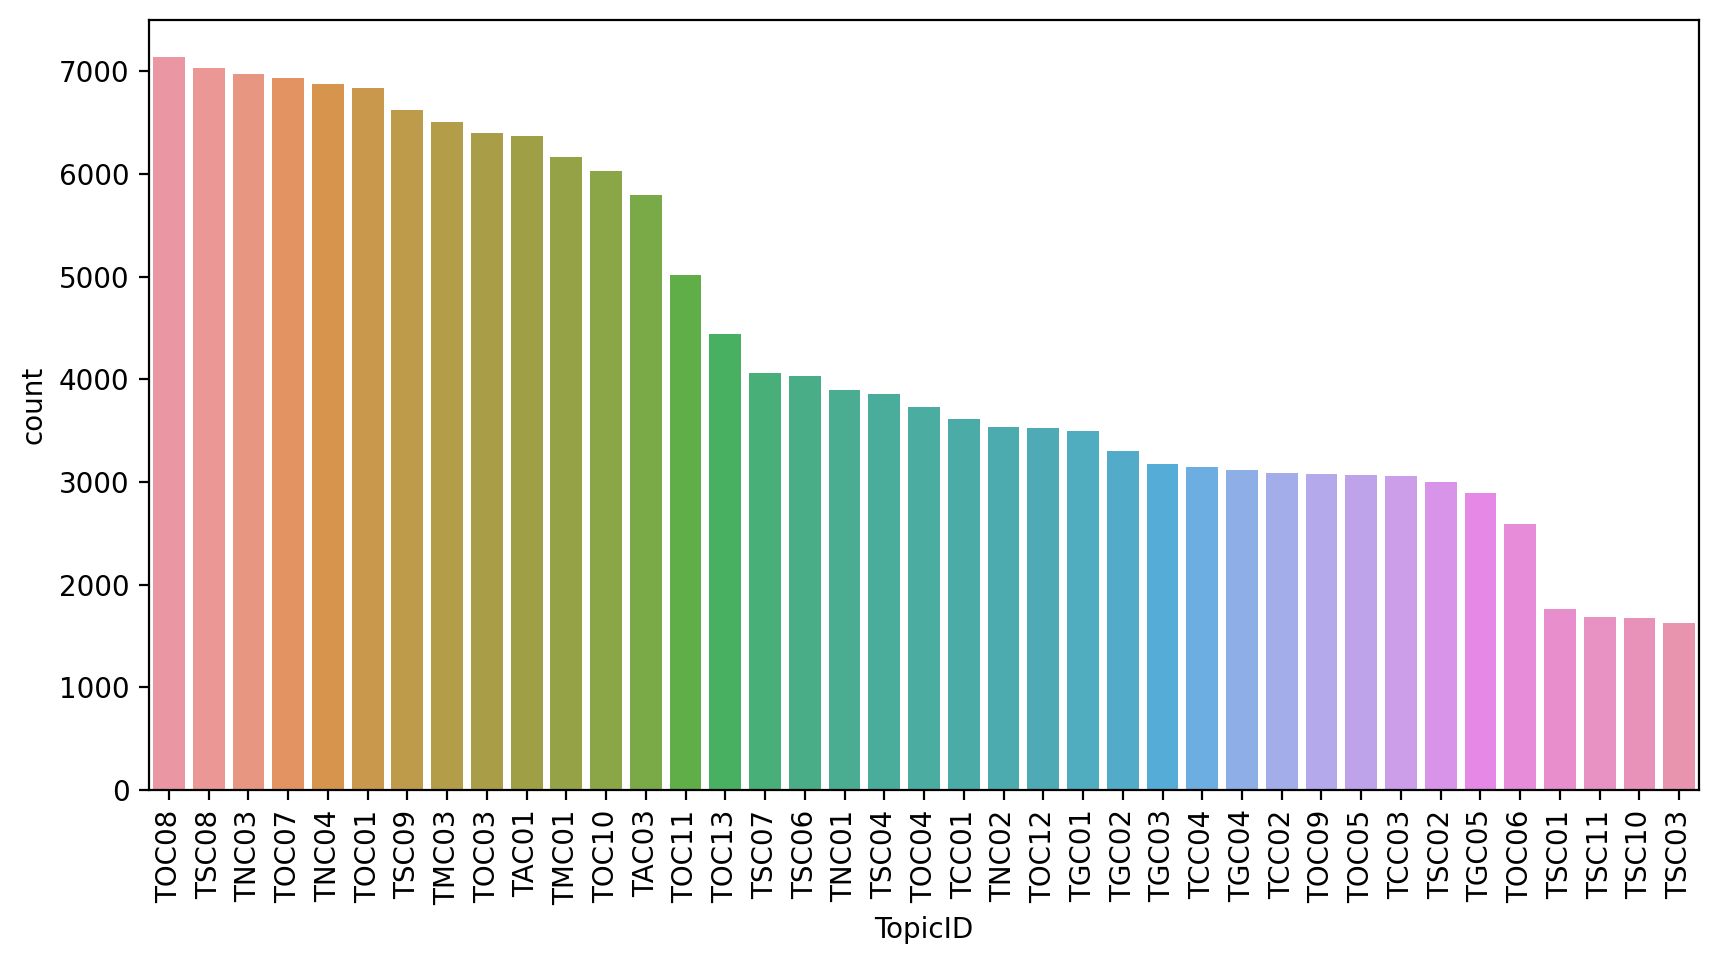

In [123]:
plt.figure(figsize=(10,5), dpi = 200)
sns.countplot(data = df, x = 'TopicID', order=df['TopicID'].value_counts().index)
plt.xticks(rotation = 90);

In [122]:
the_most_topic = len(df[df['TopicID'] == 'TOC08'])
the_less_topic = len(df[df['TopicID'] == 'TSC03'])
print(f"{df[df['TopicID'] == 'TOC08']['Topic'].iloc[0]} = {the_most_topic} people.")
print(f"{df[df['TopicID'] == 'TSC03']['Topic'].iloc[0]} = {the_less_topic} people.")

Self-rated health (good to excellent health) = 7143 people.
Pap test within past 3 years = 1626 people.


<b> What is the distribution of the data values ('Data_Value') based on the classes ('Class') with a comparison between age groups ('Age Group')? </b>

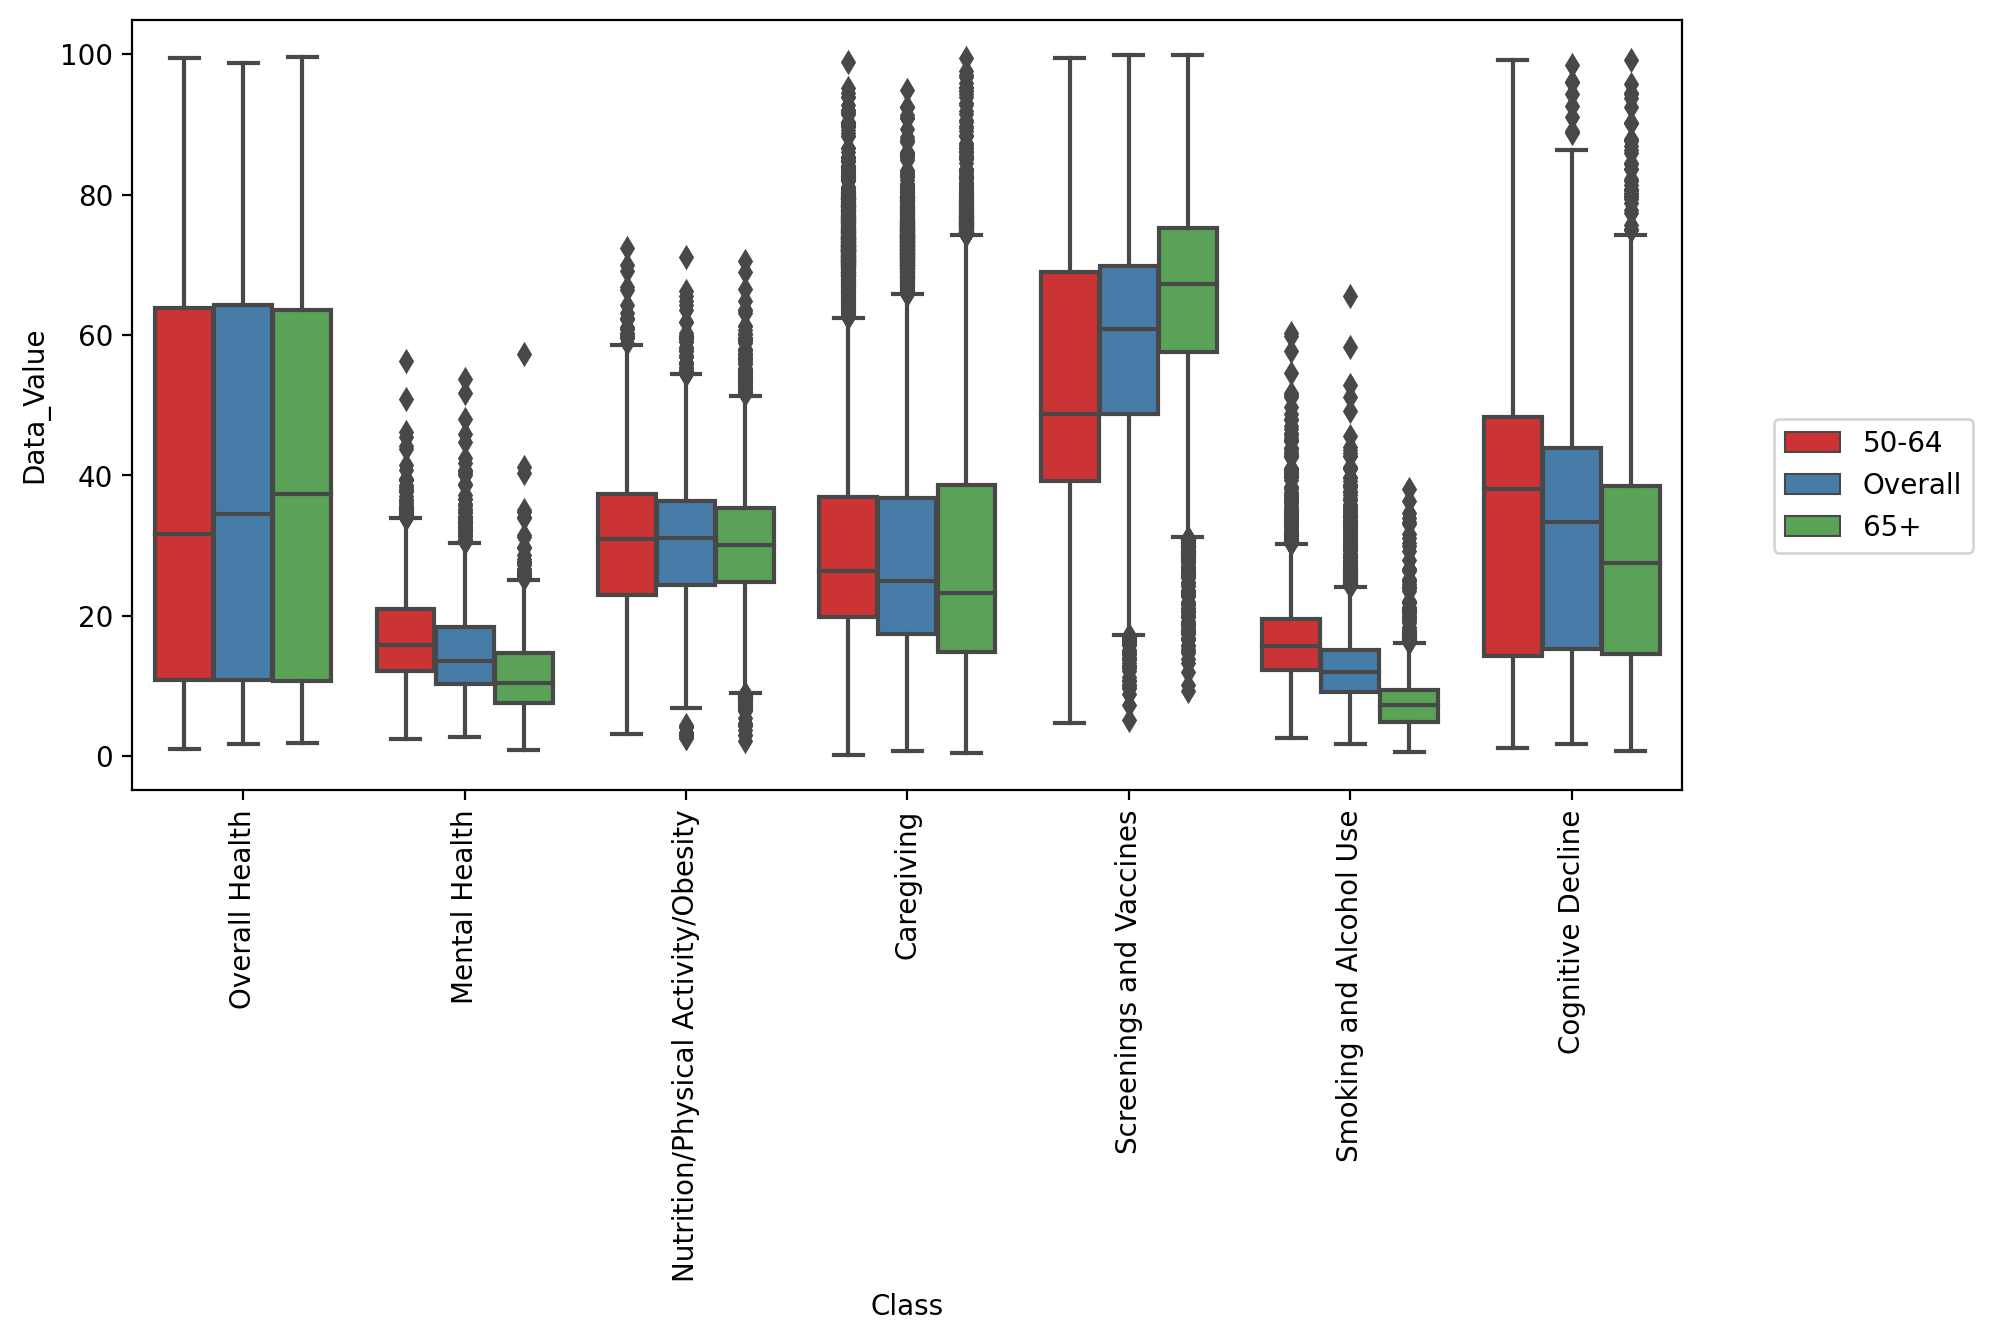

In [129]:
plt.figure(figsize = (10, 5), dpi = 200)
sns.boxplot(data = df, y ='Data_Value', 
            x = 'Class',
            hue = 'Age Group',
            palette = 'Set1')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor = (1.05,0.5))

<b> What is the distribution of data in the 'YearStart' column in the 'Alzheimer's Disease and Healthy Aging Data' dataset, visualized using kernel density estimation (KDE)? </b>

<AxesSubplot:xlabel='YearStart', ylabel='Count'>

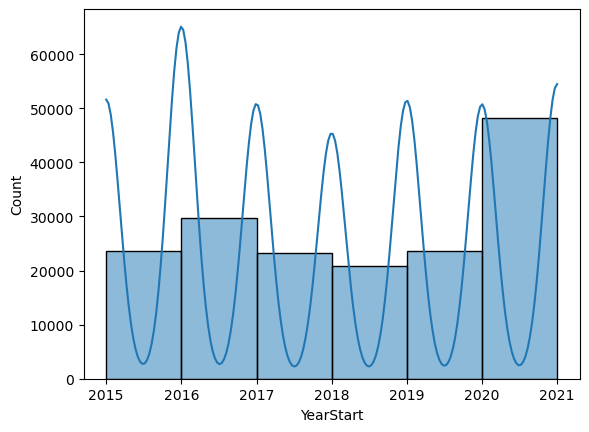

In [145]:
sns.histplot(data=df, x="YearStart", kde=True, bins = 6)